In [1]:
import urllib.request, urllib.parse, urllib.error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys


start_val='2021-01-01'
end_val='2021-06-30'


In [2]:
data_ml=pd.read_excel('./data/load-tree-all.xlsx',skiprows=3,sheet_name=0,header=0)
data_ml = data_ml.fillna(method='ffill', axis=0)


data_ml['data_g']=data_ml[ 'Год'].astype(int)
data_ml['data_m']=data_ml[ 'N месяца'].astype(int)
data_ml['data_d']=data_ml[ 'N дня'].astype(int)
data_ml['data']=pd.to_datetime(data_ml['data_g'].astype(str)+'-'+data_ml['data_m'].astype(str) +'-' + data_ml['data_d'].astype(str))
data_ml['data_temp']=data_ml['data']
data_ml=data_ml.set_index('data')
data_ml=data_ml.drop(([ 'Год','N месяца', 'N дня']), axis=1)
data_ml.head()
data_ml=data_ml[pd.DatetimeIndex(data_ml.index).year>2013]
data_ml

,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,Владимирская область,Волгоградская область,Вологодская область,Воронежская область,...,Ульяновская область,Хабаровский край,Челябинская область,Чеченская Республика,Чувашская Республика,Ярославская область,data_g,data_m,data_d,data_temp
data,,,,,,,,,,,,,,,,,,,,,
2015-01-12,16,20,11,18,19,18,11,19,10,19,...,17,19,17,18,10,11,2015,1,12,2015-01-12
2015-01-13,16,20,12,19,21,19,18,19,18,18,...,17,19,19,20,9,19,2015,1,13,2015-01-13
2015-01-14,16,20,11,19,19,19,10,19,18,19,...,18,19,17,21,9,11,2015,1,14,2015-01-14
2015-01-15,16,20,12,19,21,19,11,19,17,19,...,18,19,17,21,9,18,2015,1,15,2015-01-15
2015-01-16,16,20,10,19,21,19,10,20,18,19,...,18,19,17,21,9,11,2015,1,16,2015-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,6,11,17,9,12,18,11,18,12,18,...,10,12,15,18,10,11,2021,12,24,2021-12-24
2021-12-27,6,19,11,18,18,11,10,17,17,11,...,9,9,8,18,10,10,2021,12,27,2021-12-27
2021-12-28,7,11,11,18,17,10,10,12,10,11,...,10,11,10,18,11,10,2021,12,28,2021-12-28


In [4]:
porog=0.000000001


ter='Мурманская область'


if len(sys.argv[1:][0])>8:
    ter=sys.argv[1:][0]
print('----------------------',ter)



data_ml['hm']=data_ml[ter]
data_ml=data_ml[['hm','data_g','data_m','data_d','data_temp']]



---------------------- Мурманская область


In [5]:
mask= (data_ml['data_temp'] >= start_val) &(data_ml['data_temp']  < end_val) 
data_ml.loc[data_ml[mask].index,'isTrain'] =  False
data_ml.loc[data_ml[~mask].index,'isTrain'] =  True


/home/vishniakovai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/vishniakovai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:

#горизонт прогнозирования
idpr =pd.Series(pd.date_range('2021-01-01', freq='D', periods=366*3))
prognoz= pd.DataFrame( index=idpr)
prognoz['data_temp']=prognoz.index

prognoz['data_g']=prognoz[ 'data_temp'].dt.year
prognoz['data_m']=prognoz[ 'data_temp'].dt.month
prognoz['data_d']=prognoz[ 'data_temp'].dt.day

prognoz=prognoz[prognoz['data_temp'].dt.dayofweek<5]


data_ml=pd.concat((data_ml, prognoz), axis=0)
my_index=data_ml.index

# Разбивка дат

In [9]:
data_ml['number_dayofweek'] = data_ml['data_temp'].dt.dayofweek

# Время восхода солнца  и луны

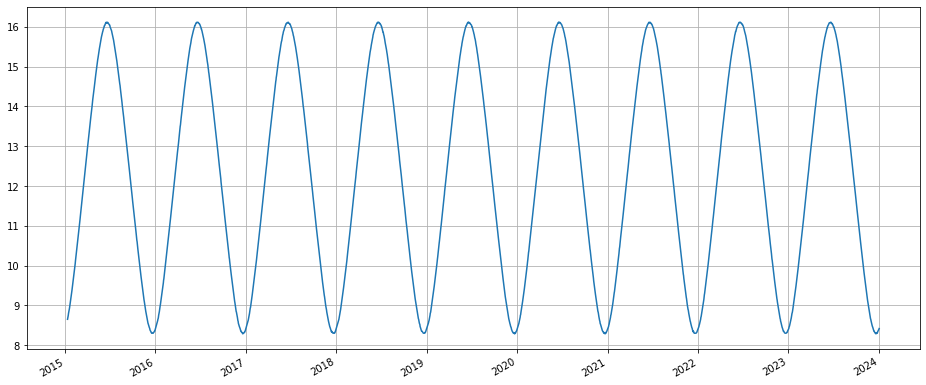

In [10]:
import ephem,datetime
sun = ephem.Sun()
moon = ephem.Moon()
raleigh = ephem.Observer()
#raleigh.lon, raleigh.lat = "86.10426", "55.4467" #kem


raleigh.lon, raleigh.lat = "134.973", "48.4649" #хабар


raleigh.horizon = '-0:34'  # USNO standard atmospheric diffraction
raleigh.pressure = 0       # atmospheric refraction parameters

def riseset_sun(date, f):
    raleigh.date = date
    sun.compute(raleigh)
    sr = ephem.localtime(f(sun))    
    return sr

def riseset_moon(date, f):
    raleigh.date = date
    moon.compute(raleigh)
    sr = ephem.localtime(f(moon))    
    return sr



def sunframe(df):
    #Солнце
    df['sunrise'] = df['data_temp'].map(lambda d: riseset_sun(d, raleigh.next_rising)) #+ np.timedelta64(7, 'h')
    df['sunset'] = df['data_temp'].map(lambda d: riseset_sun(d, raleigh.next_setting)) #+ np.timedelta64(7, 'h')
    
    df['sunrise_h']=df['sunrise'].dt.hour
    df['sunrise_m']=df['sunrise'].dt.minute/60
    
    df['sunset_h']=df['sunset'].dt.hour      
    df['sunset_m']=df['sunset'].dt.minute/60

    
    df['Dsun']=(df['sunset_h'] + df['sunset_m'])-(df['sunrise_h'] + df['sunrise_m'])
    df['sunrise']=df['sunset_h'] + df['sunset_m']
    df['sunset'] =df['sunrise_h'] + df['sunrise_m']
    

    #луна 5-10% к точности
    df['sunrise_moon'] = df['data_temp'].map(lambda d: riseset_moon(d, raleigh.next_rising)) #+ np.timedelta64(7, 'h')
    df['sunset_moon'] = df['data_temp'].map(lambda d: riseset_moon(d, raleigh.next_setting)) #+ np.timedelta64(7, 'h')

    df['sunrise_moon_h']=df['sunrise_moon'].dt.hour
    df['sunrise_moon_m']=df['sunrise_moon'].dt.minute/60
    
    df['sunset_moon_h']=df['sunset_moon'].dt.hour      
    df['sunset_moon_m']=df['sunset_moon'].dt.minute/60
    
    df['sunrise_moon']=df['sunrise_moon_h']+df['sunrise_moon_m']
    df['sunset_moon']=df['sunset_moon_h']+df['sunset_moon_m']
    
    df['Dmoon']=df['sunset_moon']-df['sunrise_moon']
    
    
    
    return df

data_ml=sunframe(data_ml)
data_ml['Dsun'].plot(figsize=(16,7)).grid()





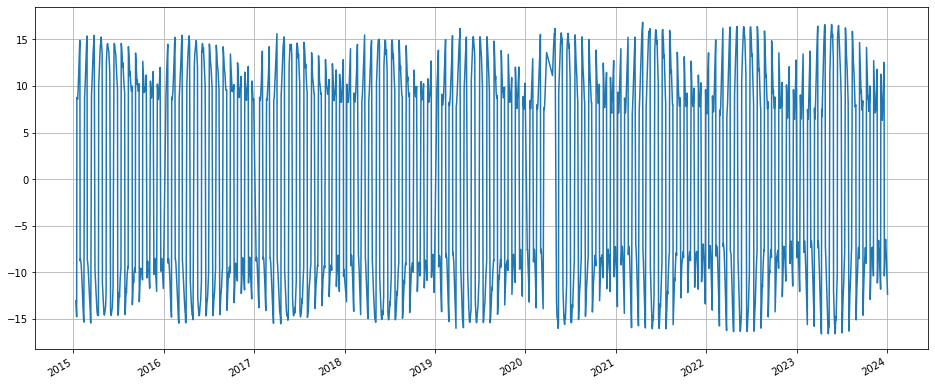

In [11]:
data_ml['Dmoon'].plot(figsize=(16,7)).grid()

# Территория

In [13]:
#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int')
moda_ml.columns=['data_d','data_m','moda1_D']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])


In [14]:
#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(1).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s1']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])

#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(2).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s2']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])

#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(3).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s3']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])

#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(4).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s4']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])


#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(-1).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s1m']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])

#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(-2).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s2m']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])


#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(-3).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s3m']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])

#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['data_d','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(-4).fillna(0, axis=0)
moda_ml.columns=['data_d','data_m','moda1_D_s4m']
data_ml=data_ml.merge(moda_ml, 'left', on=['data_d','data_m'])

In [15]:
#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['number_dayofweek','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int')
moda_ml.columns=['number_dayofweek','data_m','moda1_W']
data_ml=data_ml.merge(moda_ml, 'left', on=['number_dayofweek','data_m'])


In [16]:
#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['number_dayofweek','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(1).fillna(0, axis=0)
moda_ml.columns=['number_dayofweek','data_m','moda1_W_s1']
data_ml=data_ml.merge(moda_ml, 'left', on=['number_dayofweek','data_m'])

#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['number_dayofweek','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(2).fillna(0, axis=0)
moda_ml.columns=['number_dayofweek','data_m','moda1_W_s2']
data_ml=data_ml.merge(moda_ml, 'left', on=['number_dayofweek','data_m'])


#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['number_dayofweek','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(3).fillna(0, axis=0)
moda_ml.columns=['number_dayofweek','data_m','moda1_W_s3']
data_ml=data_ml.merge(moda_ml, 'left', on=['number_dayofweek','data_m'])





#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['number_dayofweek','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(-1).fillna(0, axis=0)
moda_ml.columns=['number_dayofweek','data_m','moda1_W_s1m']
data_ml=data_ml.merge(moda_ml, 'left', on=['number_dayofweek','data_m'])

#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['number_dayofweek','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(-2).fillna(0, axis=0)
moda_ml.columns=['number_dayofweek','data_m','moda1_W_s2m']
data_ml=data_ml.merge(moda_ml, 'left', on=['number_dayofweek','data_m'])


#Мода1 по дню недели в месяце
moda_ml=data_ml[data_ml.isTrain==True].groupby(['number_dayofweek','data_m'])['hm'].agg(lambda x:x.value_counts().index[0]).reset_index().astype('int').shift(-3).fillna(0, axis=0)
moda_ml.columns=['number_dayofweek','data_m','moda1_W_s3m']
data_ml=data_ml.merge(moda_ml, 'left', on=['number_dayofweek','data_m'])



In [17]:
data_ml[data_ml.drop(['isTrain'],axis=1).columns]=data_ml[data_ml.drop(['isTrain'],axis=1).columns].fillna(0, axis=0)


In [19]:
data_ml['sunrise_h_moda1_D']=data_ml['sunrise_h']-data_ml['moda1_D']
data_ml['sunset_h_moda1_D']=data_ml['sunset_h']-data_ml['moda1_D']

In [20]:
data_ml.index=my_index

In [21]:
'''if (ter=='Волгоградская область'):
    data_ml=data_ml[data_ml['hm']!=8.0]
    
if (ter=='Тульская область'):
    data_ml=data_ml[data_ml['hm']!=13]

if (ter=='Красноярский край'):
    data_ml=data_ml[data_ml['hm']!=5]

if (ter=='Свердловская область'):
    data_ml=data_ml[data_ml['hm']!=15]'''
if (ter=='Ставропольский край'):
    data_ml=data_ml[data_ml['hm']!=9]

In [22]:
cat_features=['moda1_D', 'moda1_D_s1',
       'moda1_D_s2', 'moda1_D_s3', 'moda1_D_s4', 'moda1_D_s1m', 'moda1_D_s2m',
       'moda1_D_s3m', 'moda1_D_s4m', 'moda1_W', 'moda1_W_s1', 'moda1_W_s2',
       'moda1_W_s3', 'moda1_W_s1m', 'moda1_W_s2m', 'moda1_W_s3m',
       'sunrise_h_moda1_D', 'sunset_h_moda1_D']

In [23]:
data_ml_train=data_ml[data_ml.isTrain==True]#.reset_index(drop=True)
data_ml_test=data_ml[data_ml.isTrain==False]#.reset_index(drop=True)
data_ml_future=data_ml[data_ml.isTrain.isnull()]


data_ml_train[cat_features]=data_ml_train[cat_features].astype('int')
data_ml_test[cat_features]=data_ml_test[cat_features].astype('int')
data_ml_future[cat_features]=data_ml_future[cat_features].astype('int')



data_vrema=data_ml_test


##Отпиливаем таргет
y_train=data_ml_train['hm'].astype('int')
X_train=data_ml_train
X_train=X_train.drop(('hm'), axis=1)
X_train=X_train.drop(('data_temp'), axis=1)
X_train=X_train.drop(('isTrain'), axis=1)

y_test=data_ml_test['hm'].astype('int')
X_test=data_ml_test
X_test=X_test.drop(('hm'), axis=1)
X_test=X_test.drop(('data_temp'), axis=1)
X_test=X_test.drop(('isTrain'), axis=1)


X_future=data_ml_future
X_future=X_future.drop(('hm'), axis=1)
X_future=X_future.drop(('data_temp'), axis=1)
X_future=X_future.drop(('isTrain'), axis=1).dropna(axis=0)

/home/vishniakovai/.local/lib/python3.6/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
X_future[X_future.index>'2020-01-01'][:30]

,data_g,data_m,data_d,number_dayofweek,sunrise,sunset,sunrise_h,sunrise_m,sunset_h,sunset_m,...,moda1_D_s4m,moda1_W,moda1_W_s1,moda1_W_s2,moda1_W_s3,moda1_W_s1m,moda1_W_s2m,moda1_W_s3m,sunrise_h_moda1_D,sunset_h_moda1_D
2021-01-01,2021,1,1,4,14.250000,5.850000,5,0.850000,14,0.250000,...,0,19,19,19,19,19,19,19,5,14
2021-01-04,2021,1,4,0,14.300000,5.850000,5,0.850000,14,0.300000,...,0,17,17,17,17,0,0,0,5,14
2021-01-05,2021,1,5,1,14.316667,5.850000,5,0.850000,14,0.316667,...,0,19,19,19,19,19,19,19,5,14
2021-01-06,2021,1,6,2,14.333333,5.833333,5,0.833333,14,0.333333,...,0,19,19,19,19,19,19,19,5,14
2021-01-07,2021,1,7,3,14.350000,5.833333,5,0.833333,14,0.350000,...,0,19,19,19,19,19,19,19,5,14
2021-01-08,2021,1,8,4,14.383333,5.833333,5,0.833333,14,0.383333,...,0,19,19,19,19,19,19,19,5,14
2021-01-11,2021,1,11,0,14.433333,5.800000,5,0.800000,14,0.433333,...,18,17,17,17,17,0,0,0,-13,-4
2021-01-12,2021,1,12,1,14.466667,5.800000,5,0.800000,14,0.466667,...,17,19,19,19,19,19,19,19,-12,-3
2021-01-13,2021,1,13,2,14.483333,5.783333,5,0.783333,14,0.483333,...,17,19,19,19,19,19,19,19,-12,-3
2021-01-14,2021,1,14,3,14.516667,5.766667,5,0.766667,14,0.516667,...,17,19,19,19,19,19,19,19,-12,-3


# CatBoost

In [25]:
ii=0
for i in X_train:
    print(i,ii)
    ii+=1

data_g 0
data_m 1
data_d 2
number_dayofweek 3
sunrise 4
sunset 5
sunrise_h 6
sunrise_m 7
sunset_h 8
sunset_m 9
Dsun 10
sunrise_moon 11
sunset_moon 12
sunrise_moon_h 13
sunrise_moon_m 14
sunset_moon_h 15
sunset_moon_m 16
Dmoon 17
moda1_D 18
moda1_D_s1 19
moda1_D_s2 20
moda1_D_s3 21
moda1_D_s4 22
moda1_D_s1m 23
moda1_D_s2m 24
moda1_D_s3m 25
moda1_D_s4m 26
moda1_W 27
moda1_W_s1 28
moda1_W_s2 29
moda1_W_s3 30
moda1_W_s1m 31
moda1_W_s2m 32
moda1_W_s3m 33
sunrise_h_moda1_D 34
sunset_h_moda1_D 35


In [26]:
X_train

,data_g,data_m,data_d,number_dayofweek,sunrise,sunset,sunrise_h,sunrise_m,sunset_h,sunset_m,...,moda1_D_s4m,moda1_W,moda1_W_s1,moda1_W_s2,moda1_W_s3,moda1_W_s1m,moda1_W_s2m,moda1_W_s3m,sunrise_h_moda1_D,sunset_h_moda1_D
2015-01-12,2015,1,12,0,13.450000,4.800000,4,0.800000,13,0.450000,...,17,17,17,17,17,0,0,0,-13,-4
2015-01-13,2015,1,13,1,13.466667,4.783333,4,0.783333,13,0.466667,...,17,19,19,19,19,19,19,19,-13,-4
2015-01-14,2015,1,14,2,13.500000,4.783333,4,0.783333,13,0.500000,...,17,19,19,19,19,19,19,19,-13,-4
2015-01-15,2015,1,15,3,13.516667,4.766667,4,0.766667,13,0.516667,...,17,19,19,19,19,19,19,19,-13,-4
2015-01-16,2015,1,16,4,13.550000,4.750000,4,0.750000,13,0.550000,...,19,19,19,19,19,19,19,19,-15,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2021,12,24,4,14.133333,5.833333,5,0.833333,14,0.133333,...,16,17,17,17,17,17,17,17,-11,-2
2021-12-27,2021,12,27,0,14.166667,5.850000,5,0.850000,14,0.166667,...,15,16,16,16,16,16,16,16,-10,-1
2021-12-28,2021,12,28,1,14.183333,5.850000,5,0.850000,14,0.183333,...,18,17,17,17,17,17,17,17,-13,-4
2021-12-29,2021,12,29,2,14.200000,5.850000,5,0.850000,14,0.200000,...,16,16,16,16,16,16,16,16,-11,-2


In [28]:
from catboost import CatBoostClassifier
modelC={}

y_multirf=0
iter=50
for i in range(iter):
    modelC[i] = CatBoostClassifier(random_seed=(42+i),
                                depth=4,custom_metric=["Precision"],
                                task_type="GPU",
                                border_count=255,
                                use_best_model=True,
                                iterations=1000)



    modelC[i].fit(X_train.fillna(0, axis=0), y_train.astype('int'),cat_features=cat_features,
              eval_set=(X_test.fillna(0, axis=0), y_test.astype('int')),plot=False,verbose=False)

    y_multirf = y_multirf +  modelC[i].predict_proba(X_test.fillna(0, axis=0))
    
y_multirf=y_multirf/iter

In [29]:
modelC[0].get_best_score()

{'learn': {'Precision:class=6': 1.0,
  'Precision:class=3': 1.0,
  'Precision:class=7': 1.0,
  'Precision:class=1': 1.0,
  'Precision:class=4': 1.0,
  'Precision:class=2': 1.0,
  'Precision:class=0': 1.0,
  'Precision:class=11': 0.6756756756756757,
  'Precision:class=12': 0.6739811912225705,
  'Precision:class=9': 1.0,
  'Precision:class=8': 0.6545454545454545,
  'Precision:class=5': 0.5935828877005348,
  'Precision:class=10': 0.6819407008086253,
  'MultiClass': 1.062526081438949},
 'validation': {'Precision:class=6': 1.0,
  'Precision:class=3': 1.0,
  'Precision:class=7': 1.0,
  'Precision:class=1': 1.0,
  'Precision:class=4': 1.0,
  'Precision:class=2': 1.0,
  'Precision:class=0': 1.0,
  'Precision:class=11': 0.019230769230769232,
  'Precision:class=12': 0.3684210526315789,
  'Precision:class=9': 1.0,
  'Precision:class=8': 0.14285714285714285,
  'Precision:class=5': 0.15384615384615385,
  'Precision:class=10': 0.47619047619047616,
  'MultiClass': 2.195687057625534}}

In [32]:
model_proba = pd.DataFrame(y_multirf)
model_proba.columns=sorted(y_train.unique())
model_proba_rez=model_proba



In [33]:
model_proba[model_proba<porog]=-1
model_proba['z']=0
model_proba['zz']=0
model_proba['zzz']=0
model_proba['zzzz']=0
model_proba['zzzzz']=0


In [34]:
#### 3 ответа
arank = model_proba.apply(np.argsort, axis=1)
ranked_cols = model_proba.columns[arank.values[:,::-1][:,:6]]
new_frame = pd.DataFrame(ranked_cols, index=model_proba.index)
new_frame.columns=['V1','V2','V3','V4','V5','V6']

model_proba_rez =  pd.concat((model_proba_rez, new_frame), axis=1)
model_proba_rez['y_test'] = pd.DataFrame(y_test.reset_index(drop=True))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
model_proba_rez['REZ1']=(model_proba_rez['y_test']==model_proba_rez['V1'])
model_proba_rez['REZ2']=model_proba_rez['REZ1'] | (model_proba_rez['y_test']==model_proba_rez['V2'])
model_proba_rez['REZ3']=model_proba_rez['REZ2'] | (model_proba_rez['y_test']==model_proba_rez['V3'])
model_proba_rez['REZ4']=model_proba_rez['REZ3'] | (model_proba_rez['y_test']==model_proba_rez['V4'])
model_proba_rez['REZ5']=model_proba_rez['REZ4'] | (model_proba_rez['y_test']==model_proba_rez['V5'])
model_proba_rez['REZ6']=model_proba_rez['REZ5'] | (model_proba_rez['y_test']==model_proba_rez['V6'])

model_proba_rez['T1']=model_proba_rez['REZ1'].sum()/model_proba_rez['REZ1'].count()
model_proba_rez['T2']=model_proba_rez['REZ2'].sum()/model_proba_rez['REZ2'].count()
model_proba_rez['T3']=model_proba_rez['REZ3'].sum()/model_proba_rez['REZ3'].count()
model_proba_rez['T4']=model_proba_rez['REZ4'].sum()/model_proba_rez['REZ4'].count()
model_proba_rez['T5']=model_proba_rez['REZ5'].sum()/model_proba_rez['REZ5'].count()
model_proba_rez['T6']=model_proba_rez['REZ6'].sum()/model_proba_rez['REZ6'].count()

model_proba_rez.replace('zzzzz',0, inplace=True)
model_proba_rez.replace('zzzz',0, inplace=True)
model_proba_rez.replace('zzz',0, inplace=True)
model_proba_rez.replace('zz',0, inplace=True)
model_proba_rez.replace('z',0, inplace=True)

model_proba_rez.T

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
9,0.0120787,0.00861251,0.00848218,0.00812016,0.00819354,0.00880522,0.00881144,0.0090586,0.00858286,0.00857891,...,0.014,0.0243071,0.013922,0.0138669,0.0143204,0.0218791,0.0133957,0.0198179,0.0141976,0.0128507
10,0.0406308,0.032803,0.0340039,0.0329442,0.0334221,0.0330938,0.0342078,0.0215543,0.0211636,0.0310228,...,0.054824,0.102396,0.0550277,0.0524148,0.171508,0.0968133,0.121469,0.0997932,0.0562074,0.122576
11,0.0586087,0.0452448,0.0453152,0.043361,0.0448333,0.0560677,0.0449777,0.0316775,0.0301765,0.0369436,...,0.0724723,0.0816013,0.0851632,0.0751986,0.147588,0.087523,0.254242,0.104733,0.135314,0.264167
12,0.0242826,0.0144265,0.0142811,0.014562,0.0149351,0.0178407,0.0145546,0.0109191,0.0109528,0.0165011,...,0.0622839,0.237419,0.071816,0.0548247,0.164279,0.240965,0.112682,0.197787,0.090597,0.11679
13,0.0118862,0.00883075,0.00859986,0.0085537,0.00879628,0.00936723,0.00931431,0.00904426,0.00866166,0.00894596,...,0.0318718,0.0739645,0.0288596,0.0298658,0.0491683,0.0666856,0.0424009,0.0513928,0.0371842,0.0456743
14,0.0183147,0.0139123,0.0139382,0.0134755,0.0135111,0.0161468,0.0147735,0.008688,0.00857257,0.0155656,...,0.461272,0.119094,0.356549,0.469699,0.123771,0.121694,0.152464,0.132274,0.156323,0.126216
15,0.043399,0.0196497,0.0204026,0.019163,0.0184615,0.0408472,0.021723,0.00969444,0.00938897,0.0181875,...,0.090638,0.114379,0.0743799,0.0930135,0.093351,0.120695,0.0692518,0.084501,0.0546391,0.0815272
16,0.085993,0.0664098,0.0660888,0.0646203,0.0618099,0.0766049,0.0648008,0.0263,0.0242719,0.03752,...,0.0346849,0.0644503,0.0307789,0.0346697,0.0467393,0.0630976,0.0438545,0.0553865,0.0294045,0.0452512
17,0.146389,0.493456,0.495336,0.490264,0.484937,0.508536,0.49008,0.0370324,0.0360437,0.100786,...,0.055889,0.0539147,0.0646721,0.0552162,0.0411063,0.0513004,0.0490054,0.0565507,0.0308679,0.0398311
18,0.388816,0.145679,0.141829,0.154616,0.163085,0.114675,0.145829,0.230905,0.235176,0.516667,...,0.0123149,0.0183275,0.0185979,0.0122374,0.0171412,0.0183397,0.0158512,0.029377,0.0212851,0.0145089


In [37]:



import sys
with open('zap.txt', 'a') as f:
    print(model_proba_rez['T3'].iloc[0],ter, file=f)


0.745455

In [38]:
print('Экономия дней')
print(247*3 - (model_proba_rez['V1'].astype('bool').astype('int').sum()+model_proba_rez['V2'].astype('bool').astype('int').sum()+model_proba_rez['V3'].astype('bool').astype('int').sum()))
print(247*3 - (model_proba_rez['V1'].astype('bool').astype('int').sum()+model_proba_rez['V2'].astype('bool').astype('int').sum()+model_proba_rez['V3'].astype('bool').astype('int').sum()+model_proba_rez['V4'].astype('bool').astype('int').sum()))
print(247*3 - (model_proba_rez['V1'].astype('bool').astype('int').sum()+model_proba_rez['V2'].astype('bool').astype('int').sum()+model_proba_rez['V3'].astype('bool').astype('int').sum()+model_proba_rez['V4'].astype('bool').astype('int').sum()+model_proba_rez['V5'].astype('bool').astype('int').sum()))


Экономия дней
390
273
156


In [40]:
y_future=0
for i in range(iter):
    y_future = y_future +  modelC[i].predict_proba(X_future.fillna(0, axis=0))

y_multirf=y_multirf/iter



index_future=pd.to_datetime(X_future['data_g'].astype(str)+'-'+X_future['data_m'].astype(str) +'-' + X_future['data_d'].astype(str))
model_future = pd.DataFrame(y_future,index=index_future)
model_future.columns=sorted(y_train.unique())
model_future


model_future[model_future<porog]=-1
model_future['z']=0
model_future['zz']=0
model_future['zzz']=0
model_future['zzzz']=0
model_future['zzzzz']=0




#### 3 ответа
arank = model_future.apply(np.argsort, axis=1)
ranked_cols = model_future.columns[arank.values[:,::-1][:,:6]]
new_frame = pd.DataFrame(ranked_cols, index=model_future.index)
new_frame.columns=['V1','V2','V3','V4','V5','V6']

new_frame.replace('zzzzz',0, inplace=True)
new_frame.replace('zzzz',0, inplace=True)
new_frame.replace('zzz',0, inplace=True)
new_frame.replace('zz',0, inplace=True)
new_frame.replace('z',0, inplace=True)

new_frame

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


,V1,V2,V3,V4,V5,V6
2021-01-01,18,19,17,16,20,11
2021-01-04,18,19,17,16,15,11
2021-01-05,18,19,17,16,20,11
2021-01-06,18,19,17,16,20,11
2021-01-07,18,19,17,20,16,11
...,...,...,...,...,...,...
2023-12-28,18,17,19,16,15,11
2023-12-29,16,17,18,15,19,11
2024-01-01,18,19,17,16,15,11
2024-01-02,18,19,17,16,20,11


In [41]:
new_frame[['V1','V2','V3','V4','V5']].to_excel('./models/'+ter+".xlsx")

In [ ]:
new_frame[new_frame.index>'2022-01-01'][:30]